In [47]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets
import pandas_profiling
import seaborn as sns

In [51]:
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

In [3]:
df1=pd.read_csv('blackFriday_train.csv')
print(df1.shape)


(550068, 12)


In [4]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df2=pd.read_csv('blackFriday_test.csv')
df2.shape

(233599, 11)

In [6]:
df2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [7]:
df=df1.append(df2,sort=False)
df.shape

(783667, 12)

In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [9]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [10]:
df.drop(['User_ID'],axis=1,inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [11]:
df['Gender']=df['Gender'].map({'F':0,'M':1})
df['Gender'].head(10)

0    0
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    1
9    1
Name: Gender, dtype: int64

In [12]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})


In [14]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [15]:
df.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [16]:
city=pd.get_dummies(df['City_Category'],drop_first=True)
city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


In [18]:
df=pd.concat([df,city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1,0,1


In [19]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
B                                  0
C                                  0
dtype: int64

In [20]:
df.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [21]:
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [22]:
df.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [23]:
df.Product_Category_2.value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [24]:
df.Product_Category_1.mode()

0    5
dtype: int64

In [25]:
df.rename(columns={'Product_Category_1':'cat1','Product_Category_2':'cat2','Product_Category_3':'cat3'},inplace=True)

In [26]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'cat1', 'cat2', 'cat3',
       'Purchase', 'B', 'C', 'B', 'C'],
      dtype='object')

In [27]:
df['cat2']=df['cat2'].fillna(df['cat2'].mode()[0])

In [28]:
df.cat2.mode()

0    8.0
dtype: float64

In [29]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
cat1                               0
cat2                               0
cat3                          545809
Purchase                      233599
B                                  0
C                                  0
B                                  0
C                                  0
dtype: int64

In [30]:
df['cat3']=df['cat3'].fillna(df['cat3'].mode()[0])

In [31]:
df.cat3.mode()

0    16.0
dtype: float64

In [32]:
df['Purchase']=df['Purchase'].fillna(df['Purchase'].mean())

In [33]:
df.isna().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
cat1                          0
cat2                          0
cat3                          0
Purchase                      0
B                             0
C                             0
B                             0
C                             0
dtype: int64

In [34]:
df.drop('City_Category',axis=1,inplace=True)

In [35]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1,0,1


In [36]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [37]:
df['Stay_In_Current_City_Years']=df.Stay_In_Current_City_Years.str.replace('+','')

In [38]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1,0,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   cat1                        783667 non-null  int64  
 7   cat2                        783667 non-null  float64
 8   cat3                        783667 non-null  float64
 9   Purchase                    783667 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
 12  B                           783667 non-null  uint8  
 13  C             

In [40]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [41]:
df.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
cat1                            int64
cat2                          float64
cat3                          float64
Purchase                      float64
B                               int32
C                               int32
B                               int32
C                               int32
dtype: object

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   cat1                        783667 non-null  int64  
 7   cat2                        783667 non-null  float64
 8   cat3                        783667 non-null  float64
 9   Purchase                    783667 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
 12  B                           783667 non-null  int32  
 13  C             

In [43]:
df_i=df.copy()
df_i.drop('Product_ID',axis=1,inplace=True)

In [44]:
df_i.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1,0,1


In [45]:
df_i.shape

(783667, 13)

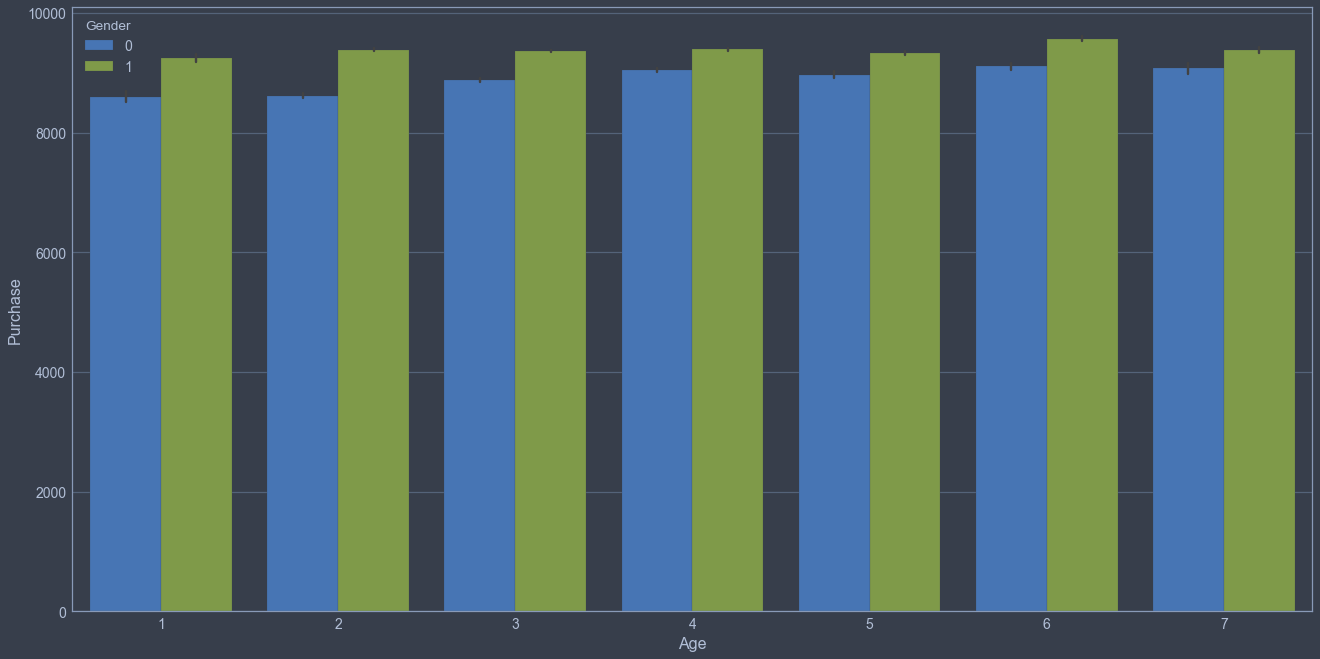

In [53]:
#Age vs Purchased
fig, ax = plt.subplots(figsize=(20, 10),dpi=80)
sns.barplot('Age','Purchase',hue='Gender',data=df_i)

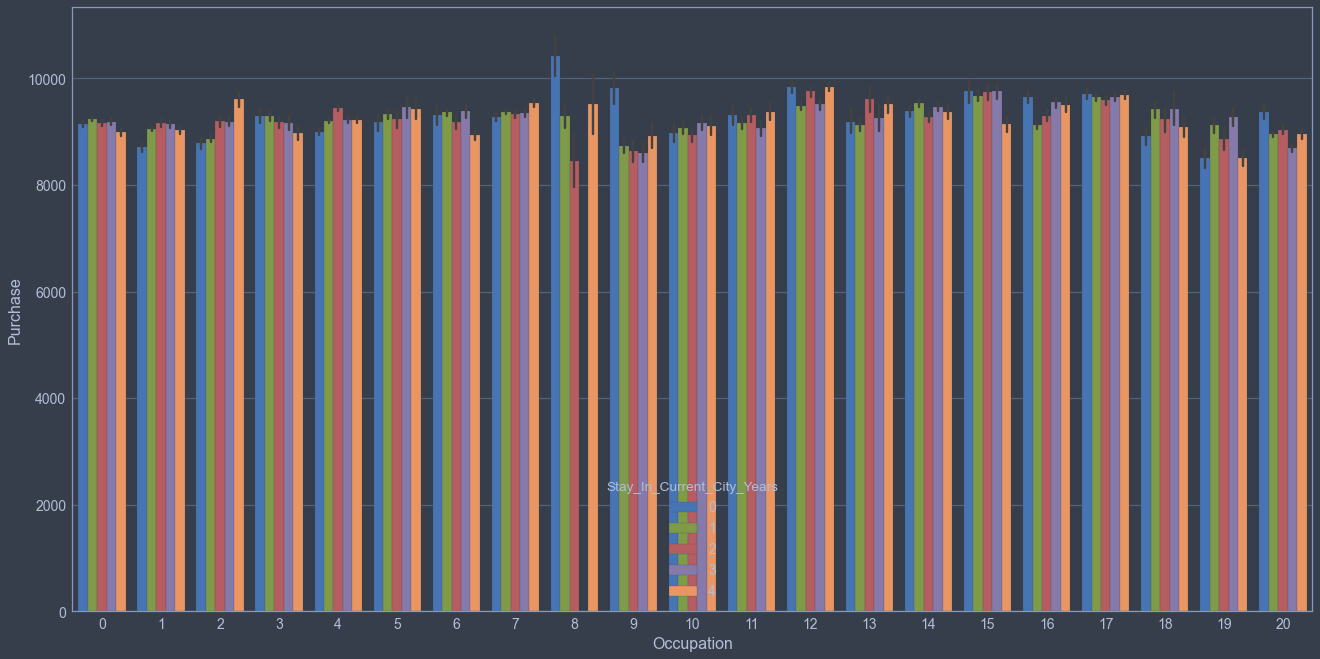

In [54]:
#Occupation vs Purchased
fig, ax = plt.subplots(figsize=(20, 10),dpi=80)
sns.barplot('Occupation','Purchase',hue='Stay_In_Current_City_Years',data=df_i)

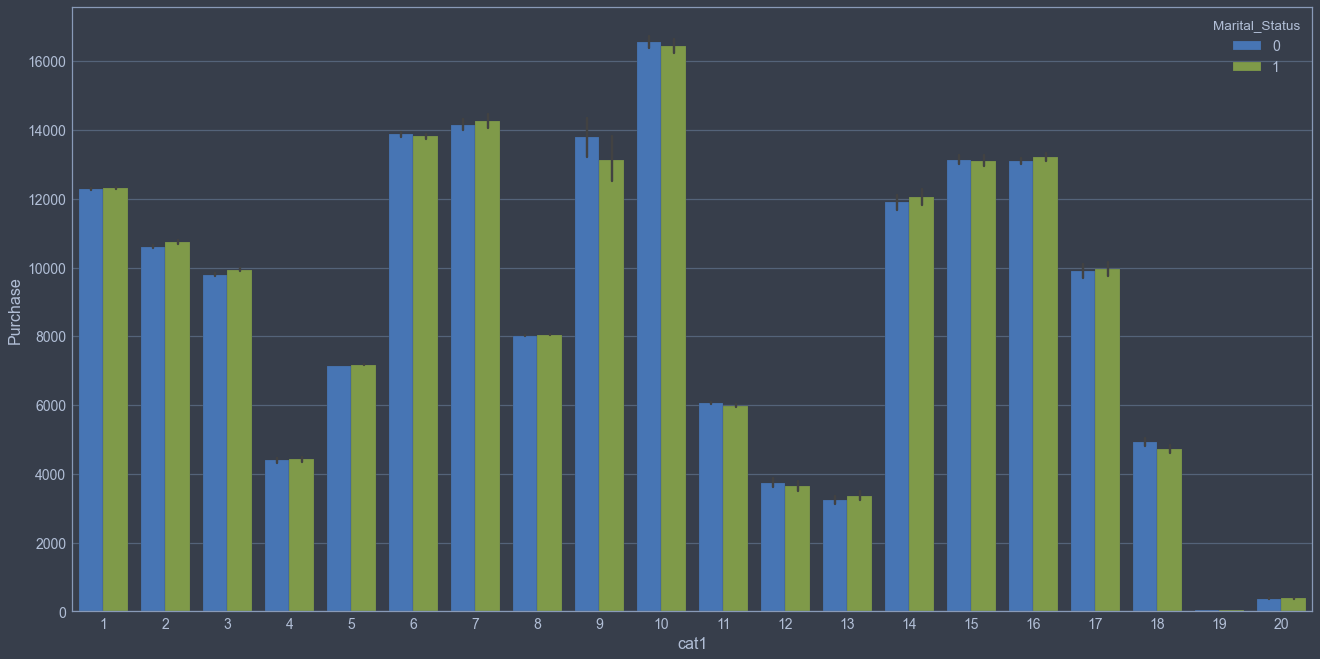

In [55]:
#Visualising P_category1 vs Purchased on the basis of marital status
fig, ax = plt.subplots(figsize=(20, 10),dpi=80)
sns.barplot('cat1','Purchase',data=df_i,hue='Marital_Status')

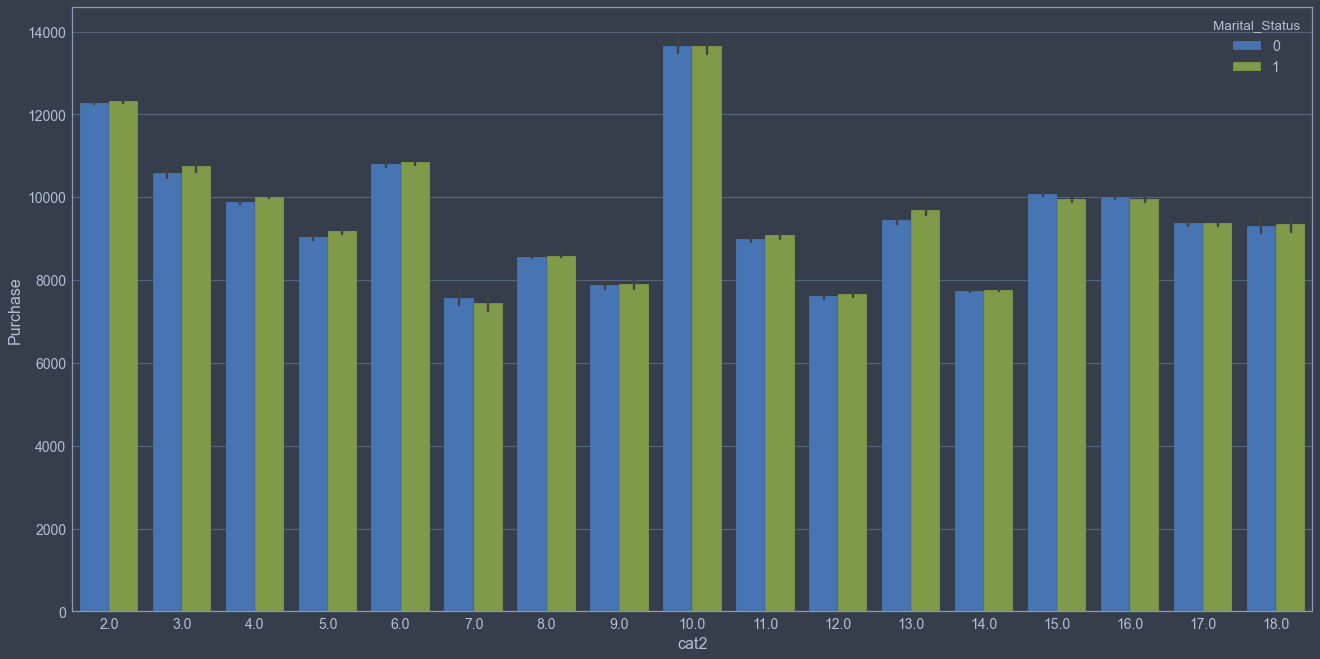

In [56]:
#Visualising P_category2 vs Purchased on the basis of marital status
fig, ax = plt.subplots(figsize=(20, 10),dpi=80)
sns.barplot('cat2','Purchase',data=df_i,hue='Marital_Status')

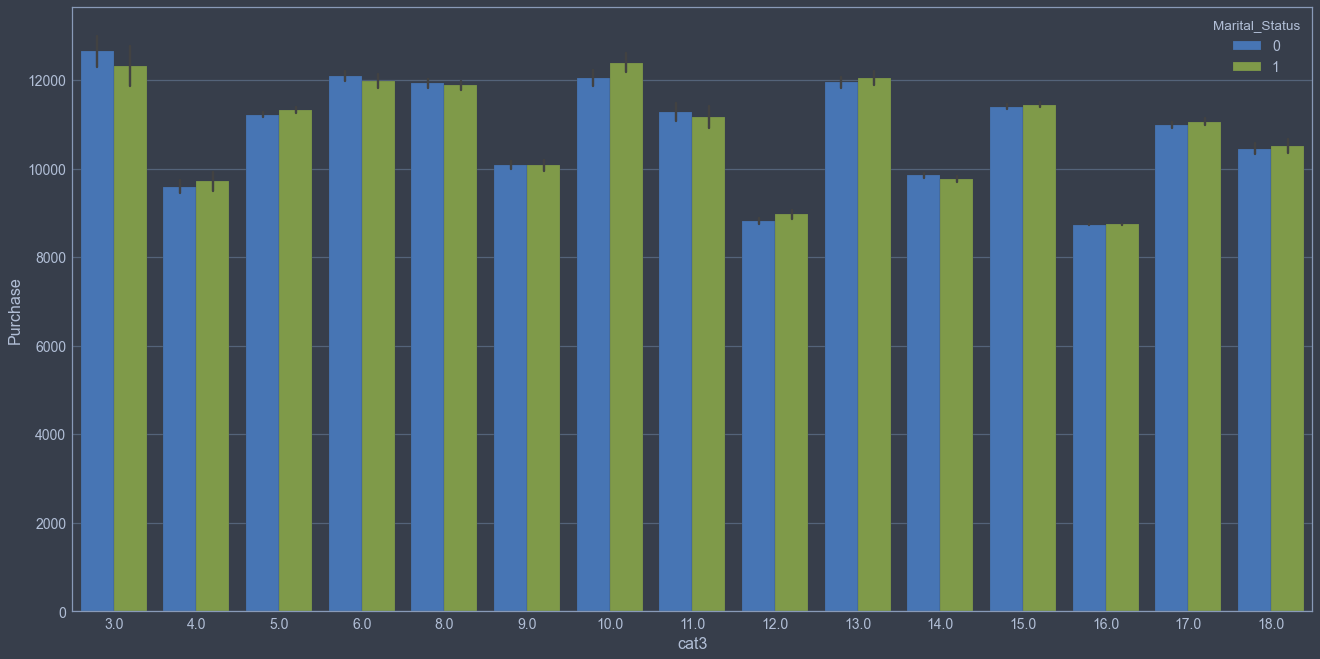

In [57]:
#Visualising P_category3 vs Purchased on the basis of marital status
fig, ax = plt.subplots(figsize=(20, 10),dpi=80)
sns.barplot('cat3','Purchase',data=df_i,hue='Marital_Status')

In [58]:
X=df_i.drop('Purchase',axis=1)
y=df_i.Purchase
X.shape,y.shape

((783667, 12), (783667,))

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(587750, 12)
(195917, 12)
(587750,)
(195917,)


In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [61]:
X_train

array([[ 0.57275431, -0.36745197,  0.6008837 , ..., -0.67228678,
         1.17365495, -0.67228678],
       [ 0.57275431, -0.36745197, -1.23913919, ..., -0.67228678,
        -0.85203918, -0.67228678],
       [ 0.57275431,  1.10995723, -0.16579251, ..., -0.67228678,
         1.17365495, -0.67228678],
       ...,
       [ 0.57275431,  1.84866184,  1.67423038, ...,  1.48746045,
        -0.85203918,  1.48746045],
       [ 0.57275431, -1.10615657, -0.93246871, ..., -0.67228678,
        -0.85203918, -0.67228678],
       [ 0.57275431, -0.36745197, -1.23913919, ...,  1.48746045,
        -0.85203918,  1.48746045]])

In [62]:
X_test

array([[ 0.57275431, -0.36745197, -0.62579823, ..., -0.67228678,
        -0.85203918, -0.67228678],
       [-1.74594931, -1.10615657, -0.62579823, ..., -0.67228678,
         1.17365495, -0.67228678],
       [ 0.57275431, -1.10615657, -0.62579823, ..., -0.67228678,
        -0.85203918, -0.67228678],
       ...,
       [ 0.57275431, -1.10615657,  0.90755418, ..., -0.67228678,
         1.17365495, -0.67228678],
       [ 0.57275431, -1.10615657,  0.29421322, ...,  1.48746045,
        -0.85203918,  1.48746045],
       [-1.74594931,  1.10995723,  0.6008837 , ...,  1.48746045,
        -0.85203918,  1.48746045]])